<a href="https://colab.research.google.com/github/Adukemi/OASIS_INFOBYTE/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1, Level 1**
# **Exploratory Data Analysis on Retail Sales**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading and Cleaning: Load the retail sales dataset.
#menu = pd.read_csv('menu.csv')
retail = pd.read_csv("/content/retail_sales_dataset.csv")
retail.head(20)
#retail.info()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [3]:
# Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


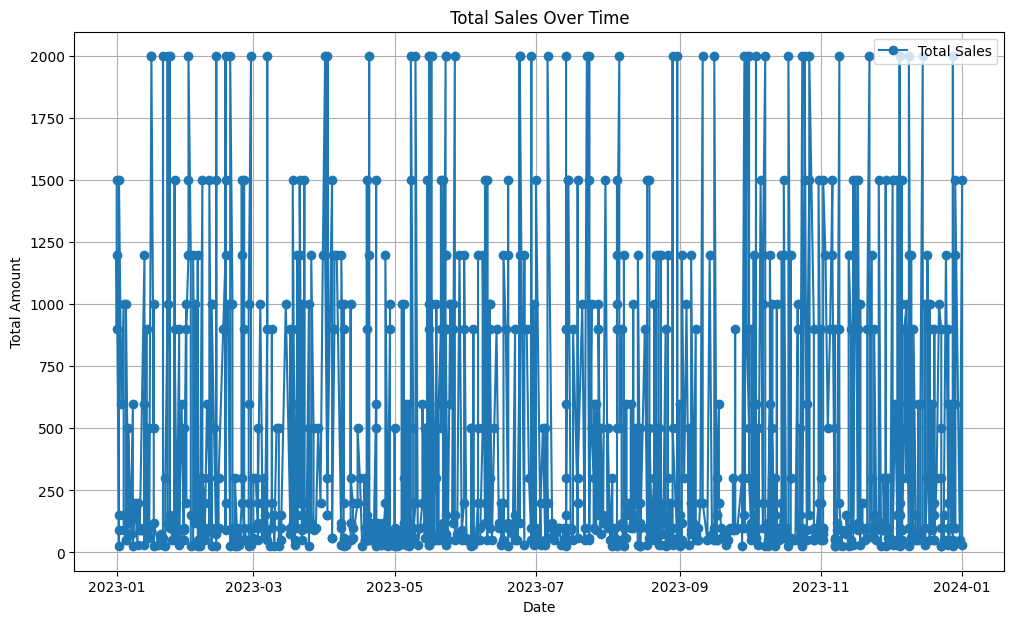

<ipython-input-4-14c2ffe568d7>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail['Total Amount'].resample('M').sum()


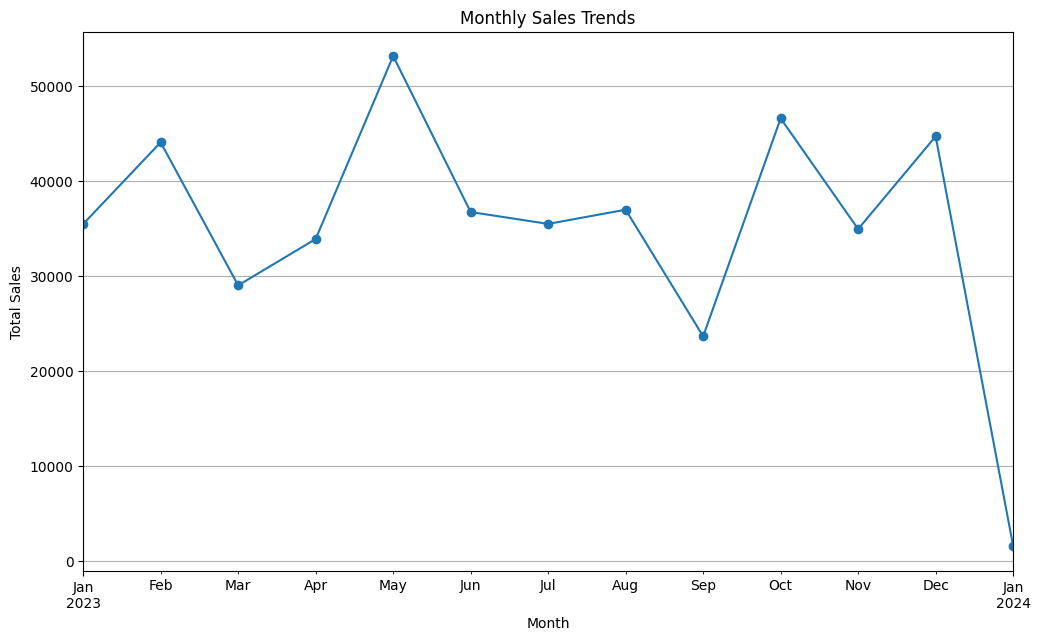

In [4]:
# Time Series Analysis: Analyze sales trends over time using time series techniques.
# Convert 'Date' column to datetime
retail['Date'] = pd.to_datetime(retail['Date'])

# Set 'Date' as the index and sort the DataFrame by the index
retail.set_index('Date', inplace=True)
retail = retail.sort_index()

# Plot the time series data
plt.figure(figsize=(12, 7))
plt.plot(retail.index, retail['Total Amount'], marker='o', linestyle='-', label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend()
plt.show()


# Resample data to monthly frequency and sum the 'Total Amount'
monthly_sales = retail['Total Amount'].resample('M').sum()

# Plot monthly sales
plt.figure(figsize=(12, 7))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<ipython-input-8-f427390ddb96>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=retail, palette='Set2', ax=axes[0])


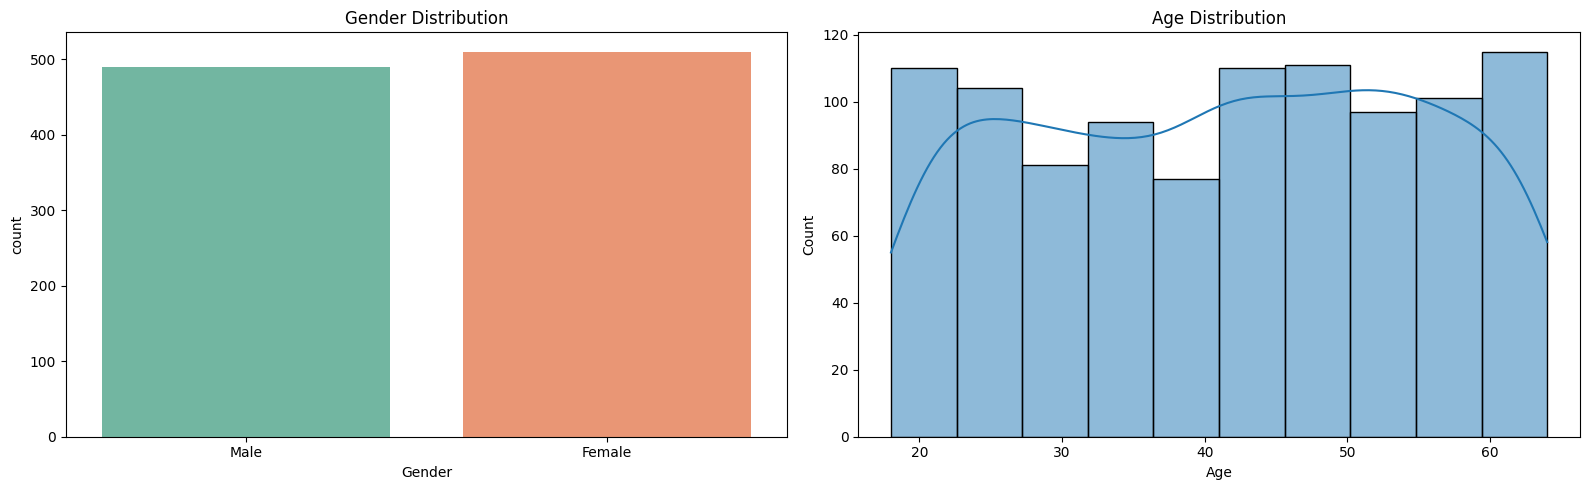

In [8]:
#Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Gender distribution plot on the first subplot
sns.countplot(x='Gender', data=retail, palette='Set2', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Age distribution plot on the second subplot
sns.histplot(retail['Age'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-14-3ca58d6b43e6>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = retail.groupby('Age Group')['Total Amount'].mean().sort_index()


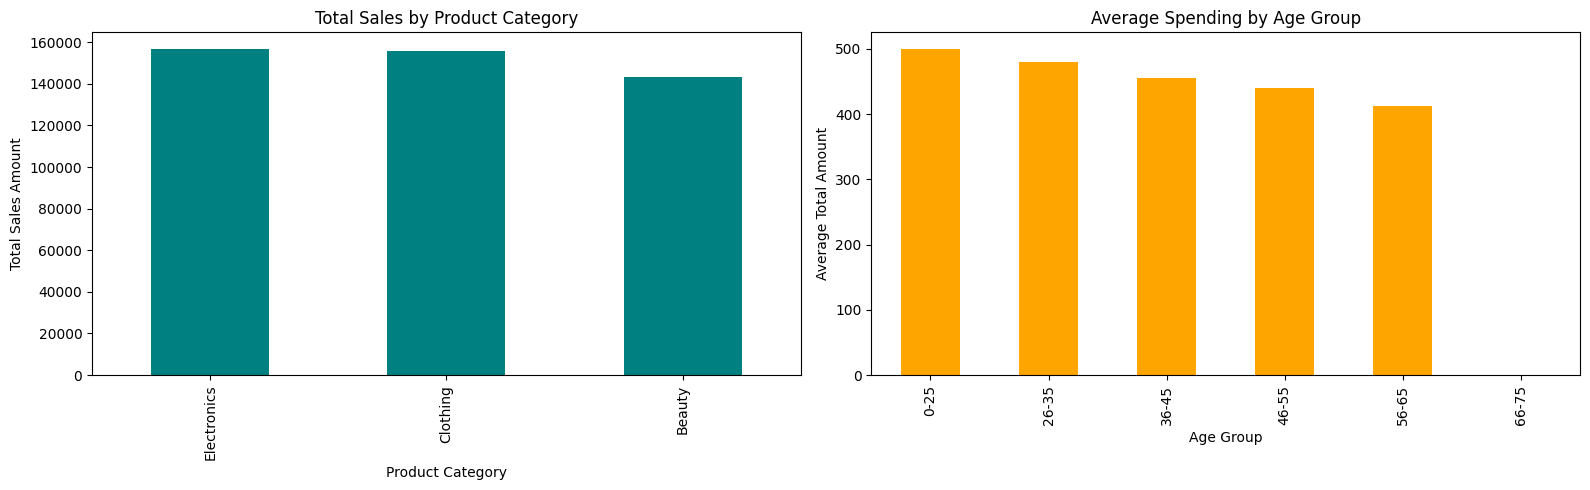

In [14]:
# Analyze Purchasing Behavior
# Explore which products are most popular and which customer segments spend the most.

# Total sales by product category
product_sales = retail.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Average spending by age group
retail['Age Group'] = pd.cut(retail['Age'], bins=[0, 25, 35, 45, 55, 65, 75], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66-75'])
age_group_spending = retail.groupby('Age Group')['Total Amount'].mean().sort_index()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Plot total sales by product category on the first subplot
product_sales.plot(kind='bar', color='teal', ax=axes[0])
axes[0].set_title('Total Sales by Product Category')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Total Sales Amount')

# Plot average spending by age group on the second subplot
age_group_spending.plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_title('Average Spending by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Total Amount')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Top 5 Customers by Total Spend:
Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64





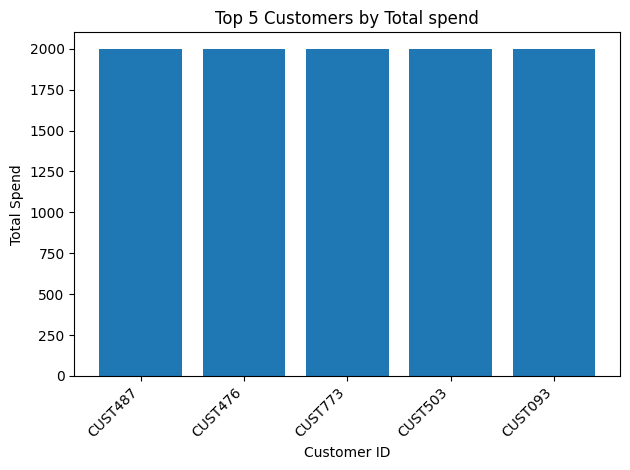

In [13]:
# Customer Segmentation Analysis
# Identify high-spending customers and purchasing patterns.

# Top customers by total spend
top_customers = retail.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)

# Print top customers
print("Top 5 Customers by Total Spend:")
print(top_customers)
print("\n\n")

plt.bar(x=top_customers.index, height=top_customers.values)
plt.title("Top 5 Customers by Total spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **RECOMMENDATION**
Based on the insights derived from the analysis, here are targeted recommendations:

1. Sales Strategies Over Time.
Peak Period Promotions: The monthly sales trends show spikes in certain months. Target these peak months (e.g., May and August) with promotions or special events to capitalize on naturally higher consumer interest. Off-Peak Marketing: Strengthen marketing efforts during lower sales months, like December and January, with seasonal discounts or holiday campaigns to boost sales.

2. Age-Based Customer Engagement.
Focus on Age 20-30 and 60+ Segments: The age distribution chart indicates a solid representation across all age groups, with peaks in the younger (20s) and older (60s) age ranges. Design marketing content that appeals specifically to these age brackets, such as trendy items for younger customers and practical, value-driven products for older ones. Age Group Promotions: Create targeted discounts for age groups with lower average spending (e.g., 45-59 age group) to encourage higher spending.

3. Product Category Focus.
Balanced Product Portfolio: The total sales by product category indicate that sales are relatively balanced across electronics, clothing, and beauty. Maintain a diverse product portfolio and consider bundling items from different categories to increase cross-category purchases. Category-Specific Campaigns: Run category-focused promotions for electronics, clothing, or beauty products during specific times of the year, depending on consumer interest and seasonality.

4. Gender-Based Marketing.
Equitable Engagement: The gender distribution chart shows an almost equal split between male and female customers. Create inclusive campaigns that cater to both genders equally to maximize engagement. Gender-Specific Offers: Tailor some product recommendations or email marketing content based on gender-specific preferences identified in the data, such as promoting clothing items more to females if they purchase them more frequently.

5. Spending Habits by Age.
High-Spending Age Groups: The average spending chart suggests consistent spending across age groups, with slightly higher amounts for ages 20-34. Target these high-spending age groups with exclusive promotions or early access to new product launches. Encouraging Higher Spending: Introduce loyalty rewards or spend-and-save programs aimed at age groups with lower average spending (e.g., 45-59 and 60+).

6. Seasonal and Targeted Promotions.
Holiday Promotions: Based on sales over time, implement holiday promotions to capitalize on gift-buying trends. The drop in December could be addressed with pre-holiday sales events to incentivize early shopping. Flash Sales: Use insights from monthly trends to introduce flash sales during slower months to increase customer interest and purchases. By aligning marketing efforts and inventory management with these insights, businesses can better cater to customer demographics and optimize sales strategies throughout the year.